In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [85]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [86]:
df.shape

(100000, 9)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [88]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [89]:
df.duplicated().sum()

3854

In [90]:
print(df.drop_duplicates(inplace=True))
print(df.duplicated().sum())

None
0


In [91]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [92]:
df['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

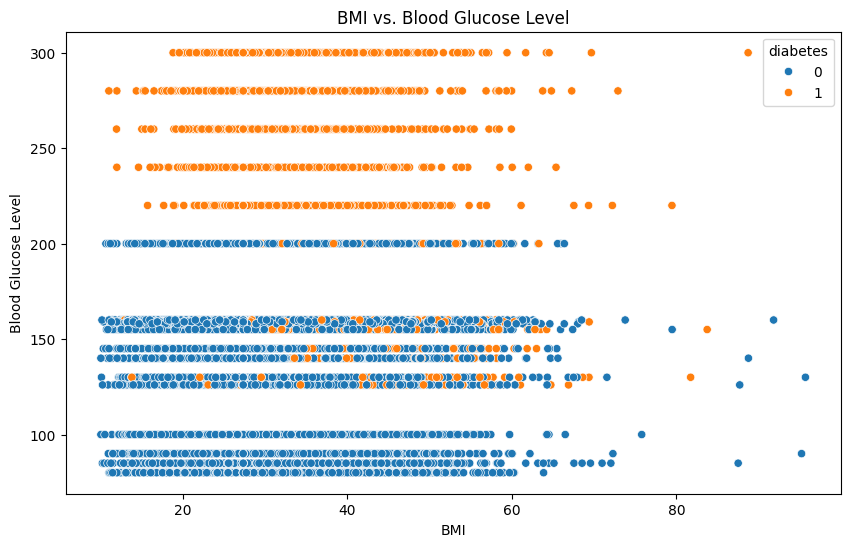

In [93]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='blood_glucose_level',hue = 'diabetes')
plt.title('BMI vs. Blood Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.show()

In [94]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

In [104]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [95]:
x = df.drop(['diabetes'], axis=1)
y = df['diabetes']

In [96]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state = 1)

In [98]:
rf = RandomForestClassifier()
ada_boost = AdaBoostClassifier()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
lr = LinearRegression()

rf.fit(x_train, y_train)
ada_boost.fit(x_train, y_train)
knn.fit(x_train, y_train)
dt.fit(x_train, y_train)

y_pred = rf.predict(x_test)
y_pred1 = ada_boost.predict(x_test)
y_pred2 = knn.predict(x_test)
y_pred3 = dt.predict(x_test)

In [107]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_continuous = lb.fit_transform(y_train).ravel()
lr.fit(x_train, y_train_continuous)
y_pred4_continuous = lr.predict(x_test)
y_pred4 = (y_pred4_continuous > 0.5).astype(int)

In [100]:
print(rf.score(x_test, y_test))
print(ada_boost.score(x_test, y_test))
print(knn.score(x_test, y_test))
print(dt.score(x_test, y_test))
print(lr.score(x_test, y_test))

0.9662506500260011
0.9690067602704108
0.9575663026521061
0.9477379095163807
0.3524521323483778


In [101]:
accuracy_RandomForestClassifier = accuracy_score(y_test, y_pred)
print(accuracy_RandomForestClassifier)
print(accuracy_score(y_test, y_pred1))
print(accuracy_score(y_test, y_pred2))
print(accuracy_score(y_test, y_pred3))
print(accuracy_score(y_test, y_pred4))

0.9662506500260011
0.9690067602704108
0.9575663026521061
0.9477379095163807
0.9368174726989079


In [102]:
cm1 = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred1)
cm3 = confusion_matrix(y_test, y_pred2)
cm4 = confusion_matrix(y_test, y_pred3)
cm5 = confusion_matrix(y_test, y_pred4)
print(cm1)
print(cm2)
print(cm3)
print(cm4)
print(cm5)

[[17424    65]
 [  584  1157]]
[[17457    32]
 [  564  1177]]
[[17358   131]
 [  685  1056]]
[[16956   533]
 [  472  1269]]
[[17484     5]
 [ 1210   531]]


In [103]:
print('classification report of Random Forest:\n',classification_report(y_test, y_pred))
print('classification report of AdaboostClassifier:\n',classification_report(y_test, y_pred1))
print('classification report of kneighborsclassifier:\n',classification_report(y_test, y_pred2))
print('classification report of DecisionTreeClassifier:\n',classification_report(y_test, y_pred3))
print('classification report of LinearRegression:\n',classification_report(y_test, y_pred4))

classification report of Random Forest:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17489
           1       0.95      0.66      0.78      1741

    accuracy                           0.97     19230
   macro avg       0.96      0.83      0.88     19230
weighted avg       0.97      0.97      0.96     19230

classification report of AdaboostClassifier:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17489
           1       0.97      0.68      0.80      1741

    accuracy                           0.97     19230
   macro avg       0.97      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230

classification report of kneighborsclassifier:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17489
           1       0.89      0.61      0.72      1741

    accuracy                           0.96    

In [106]:
input = (1,66.0,0,0,3,27.83,5.7,155)
input_as_numpy_array = np.asarray(input)
input_reshaped = input_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_reshaped)
print(std_data)
prediction = rf.predict(std_data)
print(prediction)
if(prediction[0]==0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')


[[ 1.18376945  1.07758788 -0.29005038 -0.2062479   0.40896824  0.07514227
   0.15597012  0.41021634]]
[0]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
